In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd ./drive/My\ Drive/AutonomousDriving

/content/drive/My Drive/AutonomousDriving


In [3]:
#Clone repository for first time only
!git clone --recursive https://github.com/chris28negu/Pseudo_Lidar_V2.git

Cloning into 'Pseudo_Lidar_V2'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 131 (delta 17), reused 16 (delta 4), pack-reused 87
Receiving objects: 100% (131/131), 2.90 MiB | 19.42 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [3]:
%cd ./Pseudo_Lidar_V2

/content/drive/My Drive/AutonomousDriving/Pseudo_Lidar_V2


In [ ]:
#To check if PyTorch is capable of using GPU, run following command
import torch
print(torch.cuda.is_available())
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())

True
1.5.1+cu101
10.1
7603


In [4]:
#Install require packages
!pip install configargparse==1.
!pip install tensorboardx
!pip install scipy==1.1.0

     |████████████████████████████████| 40kB 3.6MB/s 
  Created wheel for configargparse: filename=ConfigArgParse-1.0-cp36-none-any.whl size=17875 sha256=41d4d576c5ace5e0a0faadf631b15ca49902a45dc13b2fe1043e2959beccdcb2
  Stored in directory: /root/.cache/pip/wheels/0d/3a/3f/d9c3d44d4e15f125c92bd64b611106937511e20ecc34bb5229
Successfully built configargparse
     |████████████████████████████████| 317kB 4.0MB/s 
     |████████████████████████████████| 31.2MB 190kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [5]:
from src import *

Convert the KITTI velodyne ground truths to depth maps.

In [7]:
!ls ../../Datasets/argo/training/

argo_kitti_link.txt  image_2  label_2  train.txt  velodyne
calib		     image_3  planes   val.txt


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset_dir = '../../Datasets/argo/training/'

In [9]:
import os
image_2 = 'image_2/'
images = os.listdir(dataset_dir + image_2)
#print(len([img for img in images]))

dataset = []
for img in images:
  dataset.append(img[:-4])

df = pd.DataFrame(dataset, columns=['index'], dtype=np.int32)
X_trainval, X_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)
X_train, X_subval = train_test_split(X_trainval, train_size=0.75, test_size=0.25, random_state=42)
X_trainval.shape, X_train.shape, X_subval.shape, X_test.shape

((428, 1), (321, 1), (107, 1), (108, 1))

In [10]:
def write_to_file(path, data): 
  file = open(path, 'w') 
  for idx in data: 
    #print(idx)
    file.write(str(idx).zfill(6))
    file.write('\n')
    
  file.close()
  print('Done in ' + path)

In [11]:
write_to_file('./split/argo.txt', df.sort_values('index')['index'])
write_to_file('./split/trainval_argo.txt', X_trainval.sort_values('index')['index'])
write_to_file('./split/train_argo.txt', X_train.sort_values('index')['index'])
write_to_file('./split/subval_argo.txt', X_subval.sort_values('index')['index'])
write_to_file('./split/test_argo.txt', X_test.sort_values('index')['index'])

Done in ./split/argo.txt
Done in ./split/trainval_argo.txt
Done in ./split/train_argo.txt
Done in ./split/subval_argo.txt
Done in ./split/test_argo.txt


In [5]:
#Generate depth map for all argo images
!python ./src/preprocess/generate_depth_map.py \
    --data_path ../../Datasets/argo/training/ \
    --split_file ./split/argo.txt

Finish Depth Map 000000
Finish Depth Map 000001
Finish Depth Map 000002
Finish Depth Map 000003
Finish Depth Map 000004
Finish Depth Map 000005
Finish Depth Map 000006
Finish Depth Map 000007
Finish Depth Map 000008
Finish Depth Map 000009
Finish Depth Map 000010
Finish Depth Map 000011
Finish Depth Map 000012
Finish Depth Map 000013
Finish Depth Map 000014
Finish Depth Map 000015
Finish Depth Map 000016
Finish Depth Map 000017
Finish Depth Map 000018
Finish Depth Map 000019
Finish Depth Map 000020
Finish Depth Map 000021
Finish Depth Map 000022
Finish Depth Map 000023
Finish Depth Map 000024
Finish Depth Map 000025
Finish Depth Map 000026
Finish Depth Map 000027
Finish Depth Map 000028
Finish Depth Map 000029
Finish Depth Map 000030
Finish Depth Map 000031
Finish Depth Map 000032
Finish Depth Map 000033
Finish Depth Map 000034
Finish Depth Map 000035
Finish Depth Map 000036
Finish Depth Map 000037
Finish Depth Map 000038
Finish Depth Map 000039
Finish Depth Map 000040
Finish Depth Map

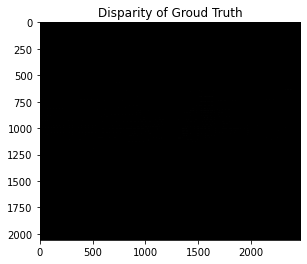

In [8]:
#Generate ground truth disparity
fig = plt.figure() #figsize=(15, 15)
ax = fig.gca()

depth_map_dir = dataset_dir + 'depth_map/'
img_array = np.load(depth_map_dir + '000150.npy', allow_pickle=True)
ax.imshow(img_array, cmap='gray') 
ax.set_title('Disparity of Groud Truth')

plt.show()
fig.savefig("argo_groud_truth_disparity.pdf")

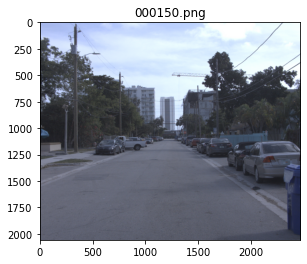

In [9]:
fig = plt.figure() #figsize=(25, 25)
ax = fig.gca()

image_2 = dataset_dir + 'image_2/' 
img = plt.imread(image_2 + '000150.png', 0)
ax.imshow(img)
ax.set_title('000150.png')

plt.show()
fig.savefig("argo_sample_image.pdf")

Train SDNet on Argo-Kitti Dataset

In [20]:
#Train and validate SDNet on ARGO-KITTI Dataset
#--pretrain ./results/sdn_sceneflow/sdn_sceneflow.pth
!python ./src/main.py --config ./src/configs/sdn_argo_train.config \
    --resume ./results/sdn_argo_train/checkpoint.pth.tar \
    --epochs 300 --eval_interval 10 --argo

[2020-12-25 06:14:20 main.py:107] INFO     arch: SDNet
[2020-12-25 06:14:20 main.py:107] INFO     argo: True
[2020-12-25 06:14:20 main.py:107] INFO     btrain: 4
[2020-12-25 06:14:20 main.py:107] INFO     bval: 1
[2020-12-25 06:14:20 main.py:107] INFO     calib_value: 1017
[2020-12-25 06:14:20 main.py:107] INFO     checkpoint_interval: 5
[2020-12-25 06:14:20 main.py:107] INFO     config: ./src/configs/sdn_argo_train.config
[2020-12-25 06:14:20 main.py:107] INFO     data_list: None
[2020-12-25 06:14:20 main.py:107] INFO     data_tag: None
[2020-12-25 06:14:20 main.py:107] INFO     data_type: depth
[2020-12-25 06:14:20 main.py:107] INFO     datapath: ../../Datasets/argo/training/
[2020-12-25 06:14:20 main.py:107] INFO     dataset: argo
[2020-12-25 06:14:20 main.py:107] INFO     down: 2
[2020-12-25 06:14:20 main.py:107] INFO     dynamic_bs: False
[2020-12-25 06:14:20 main.py:107] INFO     epochs: 300
[2020-12-25 06:14:20 main.py:107] INFO     eval_interval: 10
[2020-12-25 06:14:20 main.py

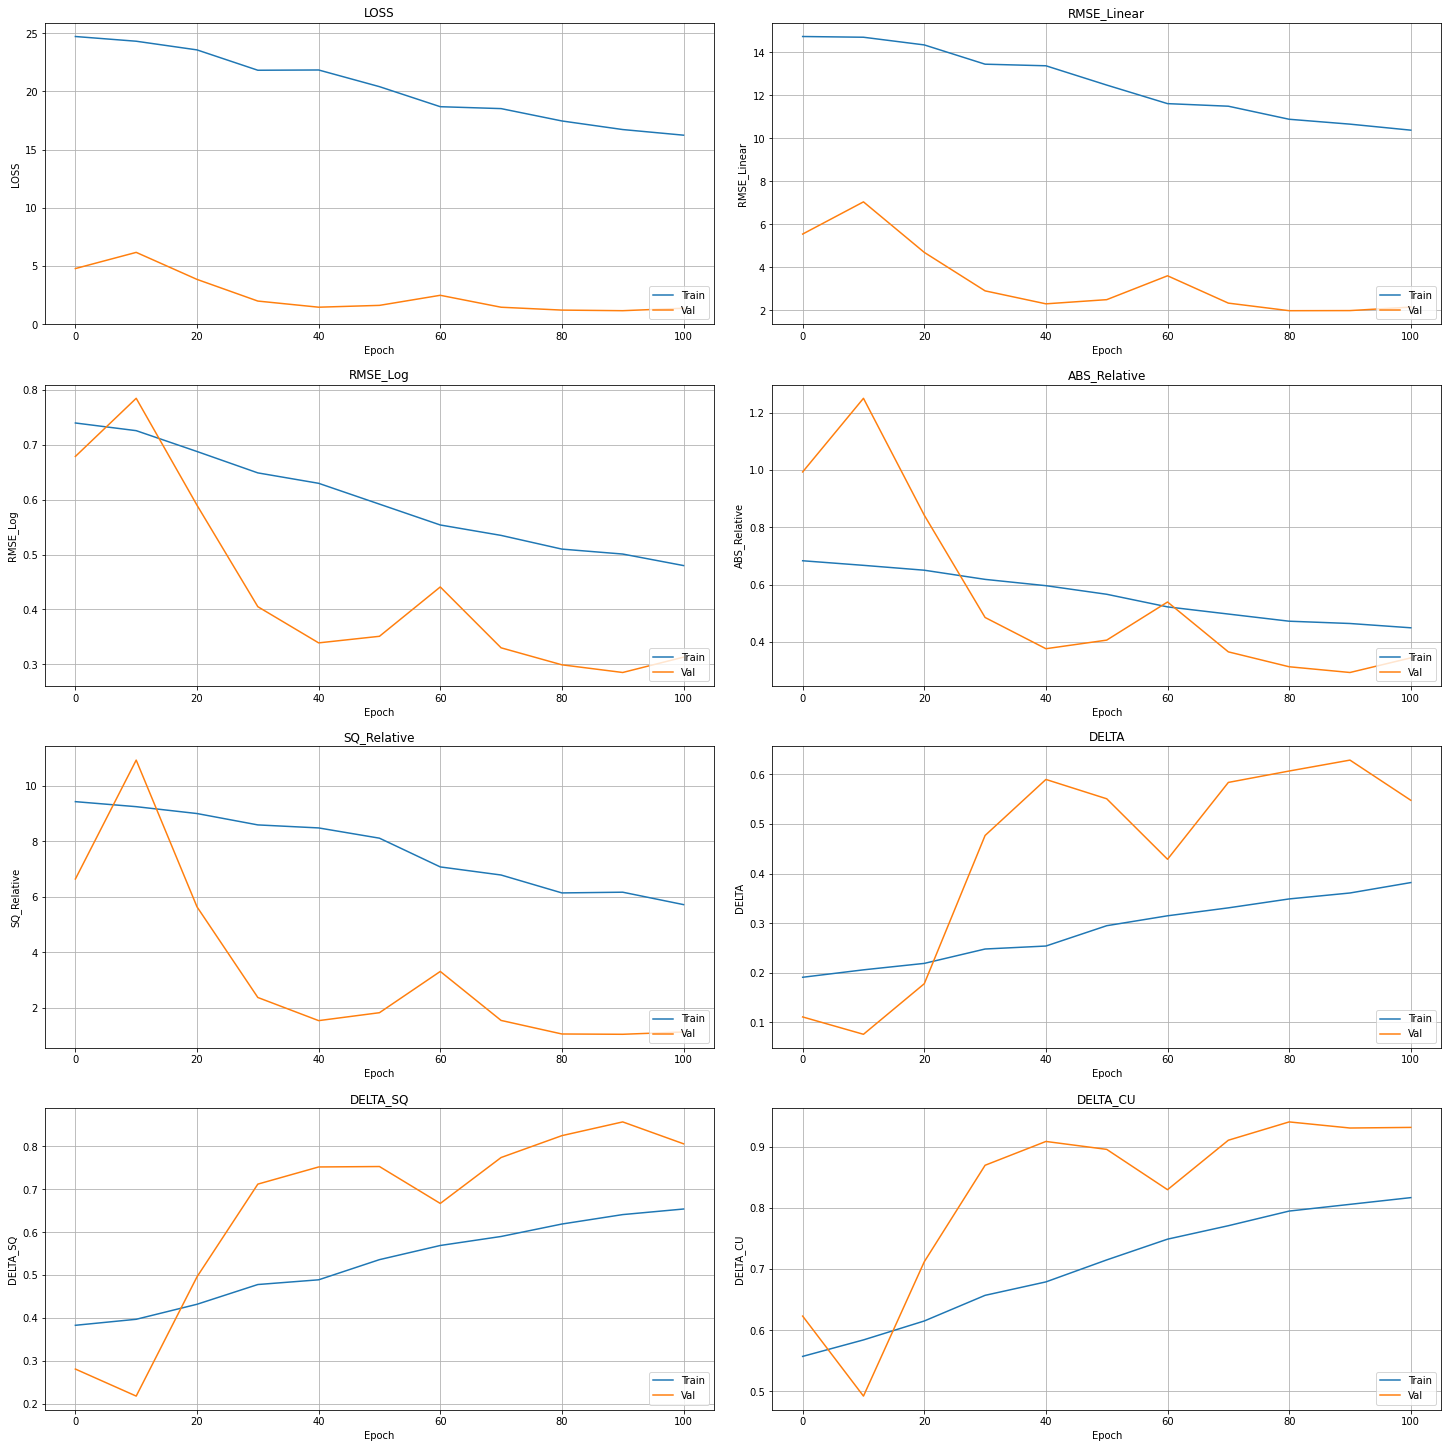

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

#fig generation to plot the metric between train and validation
#The following code is embedded into ./src/main.py to plot metric during trainning the model
#Data get from train.log 
train_metrics = [(0, 24.712, 14.731, 0.740, 0.683, 9.437, 0.191, 0.383, 0.557),
                 (10, 24.307, 14.697, 0.726, 0.667, 9.256, 0.206, 0.397, 0.584),
                 (20, 23.562, 14.340, 0.688, 0.650, 9.008, 0.219, 0.432, 0.615),
                 (30, 21.815, 13.444, 0.649, 0.618, 8.598, 0.248, 0.478, 0.657),
                 (40, 21.837, 13.370, 0.630, 0.596, 8.489, 0.254, 0.489, 0.679),
                 (50, 20.405, 12.473, 0.592, 0.566, 8.119, 0.295, 0.536, 0.715),
                 (60, 18.684, 11.610, 0.554, 0.522, 7.082, 0.315, 0.569, 0.749),
                 (70, 18.520, 11.490, 0.535, 0.497, 6.790, 0.331, 0.590, 0.771),
                 (80, 17.459, 10.883, 0.510, 0.472, 6.144, 0.349, 0.619, 0.795),
                 (90, 16.722, 10.656, 0.501, 0.464, 6.170, 0.361, 0.641, 0.806),
                 (100, 16.238, 10.376, 0.480, 0.449, 5.722, 0.382, 0.654, 0.817)]
test_metrics = [(0, 4.783, 5.545, 0.679, 0.993, 6.646, 0.111, 0.281, 0.623),
                (10, 6.173, 7.042, 0.785, 1.250, 10.936, 0.076, 0.218, 0.492),
                (20, 3.852, 4.693, 0.590, 0.842, 5.641, 0.178, 0.496, 0.712),
                (30, 1.992, 2.904, 0.405, 0.485, 2.371, 0.477, 0.712, 0.870),
                (40, 1.465, 2.301, 0.339, 0.376, 1.536, 0.590, 0.752, 0.909),
                (50, 1.622, 2.495, 0.351, 0.406, 1.822, 0.551, 0.753, 0.896),
                (60, 2.487, 3.605, 0.441, 0.539, 3.311, 0.429, 0.667, 0.830),
                (70, 1.462, 2.334, 0.330, 0.365, 1.543, 0.584, 0.774, 0.911),
                (80, 1.216, 1.982, 0.299, 0.313, 1.054, 0.607, 0.825, 0.941),
                (90, 1.165, 1.987, 0.285, 0.293, 1.043, 0.629, 0.857, 0.931),
                (100, 1.375, 2.149, 0.313, 0.344, 1.126, 0.548, 0.806, 0.932)]

def plot_trainval_metric(df_train_metric, df_test_metric):
    fig, axes = plt.subplots(nrows=4, ncols=2, constrained_layout=True, figsize=(20,20))
    columns = ['LOSS', 'RMSE_Linear', 'RMSE_Log', 'ABS_Relative', 'SQ_Relative', 'DELTA', 'DELTA_SQ', 'DELTA_CU']
    
    for ax, column in zip(axes.flat, columns):
      ax.plot(df_train_metric['EPOCH'], df_train_metric[column], label='Train')
      ax.plot(df_test_metric['EPOCH'], df_test_metric[column], label='Val')
      ax.set_title(column)
      ax.set_ylabel(column)
      ax.set_xlabel('Epoch')
      ax.grid(True)
      ax.legend(loc="lower right")
     
    plt.show()
    fig.savefig("argo_trainval_metric.pdf")

df_train_metric = pd.DataFrame(train_metrics, columns=['EPOCH', 'LOSS', 'RMSE_Linear', 'RMSE_Log', 'ABS_Relative', 'SQ_Relative', 'DELTA', 'DELTA_SQ', 'DELTA_CU'])
df_test_metric = pd.DataFrame(test_metrics, columns=['EPOCH', 'LOSS', 'RMSE_Linear', 'RMSE_Log', 'ABS_Relative', 'SQ_Relative', 'DELTA', 'DELTA_SQ', 'DELTA_CU'])
plot_trainval_metric(df_train_metric, df_test_metric)

Evaluation

In [14]:
#Evaluate on test set
!python ./src/main.py --config ./src/configs/sdn_argo_train.config \
    --resume ./results/sdn_argo_train/checkpoint.pth.tar \
    --save_path ./results/sdn_argo_test \
    --split_val ./split/test_argo.txt \
    --evaluate --argo

[2020-12-25 05:44:43 main.py:107] INFO     arch: SDNet
[2020-12-25 05:44:43 main.py:107] INFO     argo: True
[2020-12-25 05:44:43 main.py:107] INFO     btrain: 4
[2020-12-25 05:44:43 main.py:107] INFO     bval: 1
[2020-12-25 05:44:43 main.py:107] INFO     calib_value: 1017
[2020-12-25 05:44:43 main.py:107] INFO     checkpoint_interval: 5
[2020-12-25 05:44:43 main.py:107] INFO     config: ./src/configs/sdn_argo_train.config
[2020-12-25 05:44:43 main.py:107] INFO     data_list: None
[2020-12-25 05:44:43 main.py:107] INFO     data_tag: None
[2020-12-25 05:44:43 main.py:107] INFO     data_type: depth
[2020-12-25 05:44:43 main.py:107] INFO     datapath: ../../Datasets/argo/training/
[2020-12-25 05:44:43 main.py:107] INFO     dataset: argo
[2020-12-25 05:44:43 main.py:107] INFO     down: 2
[2020-12-25 05:44:43 main.py:107] INFO     dynamic_bs: False
[2020-12-25 05:44:43 main.py:107] INFO     epochs: 300
[2020-12-25 05:44:43 main.py:107] INFO     eval_interval: 50
[2020-12-25 05:44:43 main.py

Generate Predictions

In [7]:
#Using the model trained on Argo training set, and generating predictions on training + validation + test sets
!python ./src/main.py --config ./src/configs/sdn_argo_train.config \
    --resume ./results/sdn_argo_train/checkpoint.pth.tar \
    --save_path ./results/sdn_argo_trainval \
    --data_list ./split/argo.txt \
    --generate_depth_map --argo --data_tag trainval

[2020-12-26 02:46:14 main.py:107] INFO     arch: SDNet
[2020-12-26 02:46:15 main.py:107] INFO     argo: True
[2020-12-26 02:46:15 main.py:107] INFO     btrain: 4
[2020-12-26 02:46:15 main.py:107] INFO     bval: 1
[2020-12-26 02:46:15 main.py:107] INFO     calib_value: 1017
[2020-12-26 02:46:15 main.py:107] INFO     checkpoint_interval: 5
[2020-12-26 02:46:15 main.py:107] INFO     config: ./src/configs/sdn_argo_train.config
[2020-12-26 02:46:15 main.py:107] INFO     data_list: ./split/argo.txt
[2020-12-26 02:46:15 main.py:107] INFO     data_tag: trainval
[2020-12-26 02:46:15 main.py:107] INFO     data_type: depth
[2020-12-26 02:46:15 main.py:107] INFO     datapath: ../../Datasets/argo/training/
[2020-12-26 02:46:15 main.py:107] INFO     dataset: argo
[2020-12-26 02:46:15 main.py:107] INFO     down: 2
[2020-12-26 02:46:15 main.py:107] INFO     dynamic_bs: False
[2020-12-26 02:46:15 main.py:107] INFO     epochs: 300
[2020-12-26 02:46:15 main.py:107] INFO     eval_interval: 50
[2020-12-26 

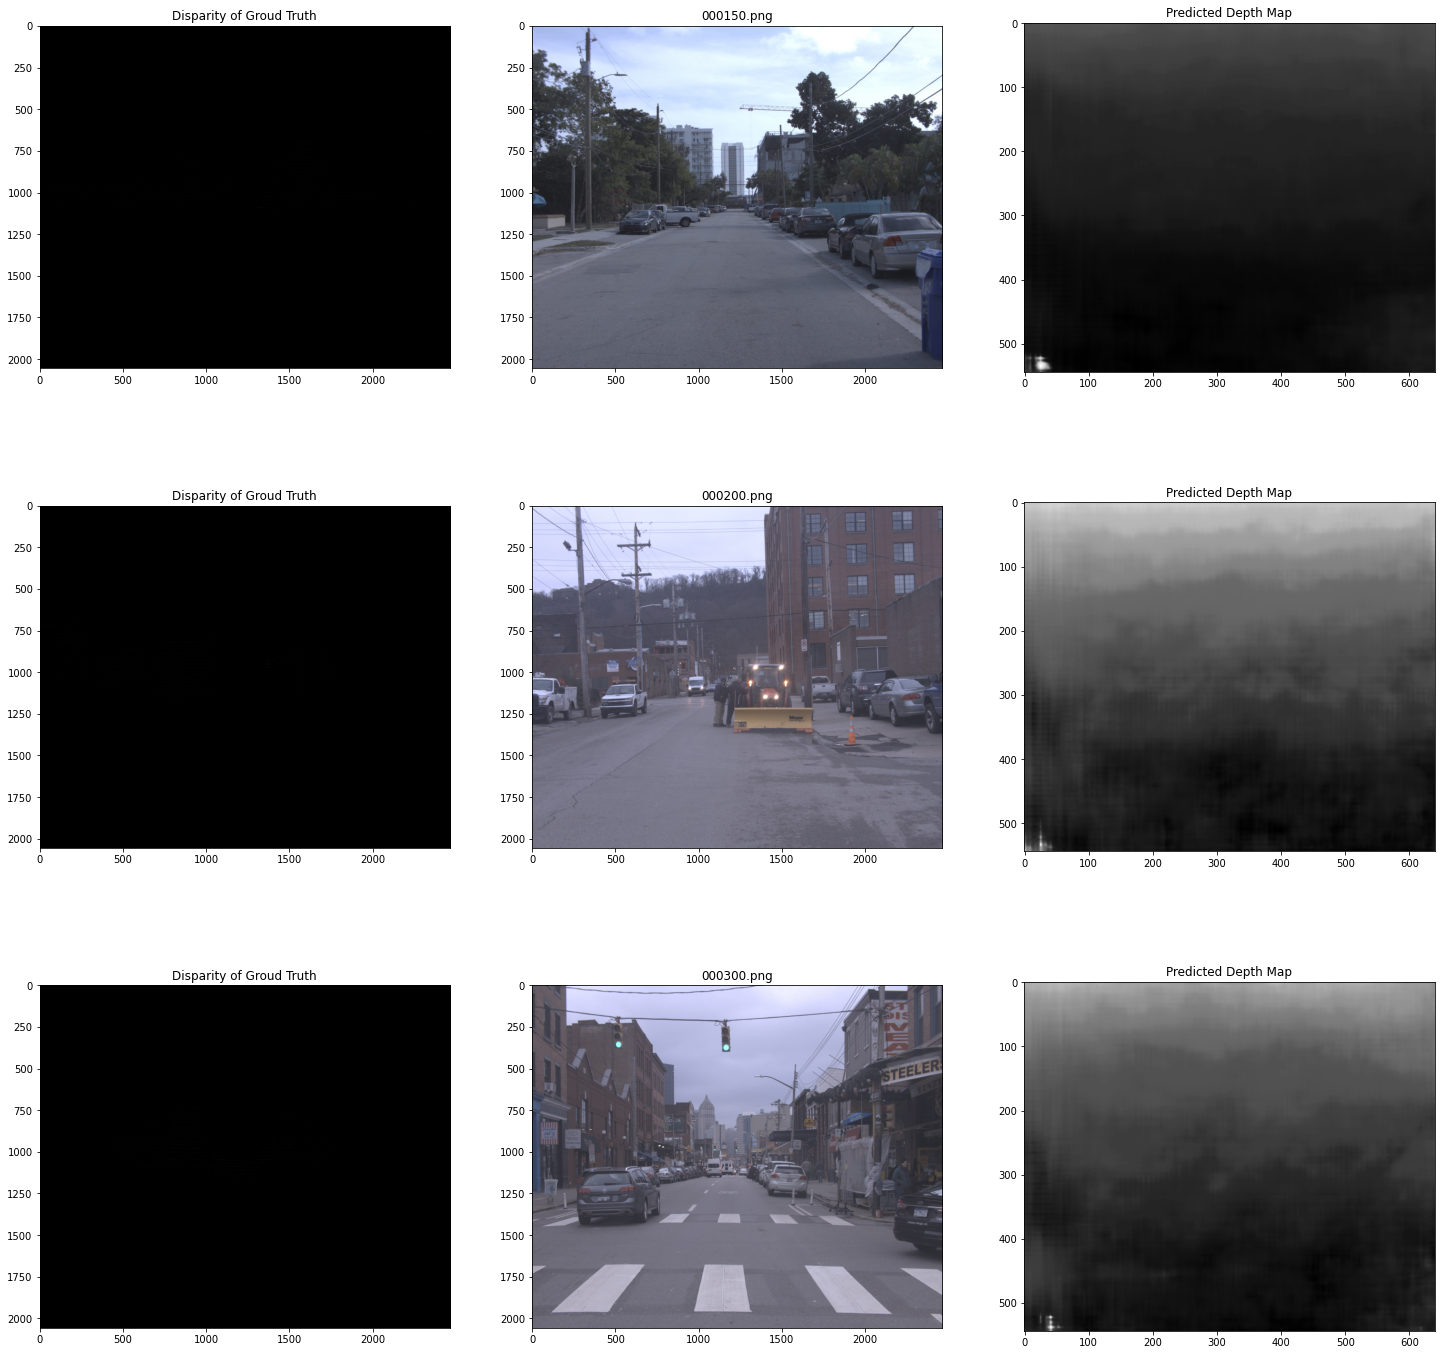

In [8]:
#Compare ground truth and predicted depth map
fig, axes = plt.subplots(3, 3, figsize=(25, 25))

predict_depth_map_dir = './results/sdn_argo_trainval/depth_maps/trainval/'

i = 0
for i, j in zip(range(3), ['150', '200', '300']):
  depth_map_dir = dataset_dir + 'depth_map/'
  img_array = np.load(depth_map_dir + '000' + j + '.npy', allow_pickle=True)
  axes[i,0].imshow(img_array, cmap='gray') #interpolation="nearest"
  axes[i,0].set_title('Disparity of Groud Truth')

  image_2 = dataset_dir + 'image_2/' 
  img = plt.imread(image_2 + '000' + j + '.png', 0)
  axes[i,1].imshow(img)
  axes[i,1].set_title('000' + j + '.png')

  predict_img_array = np.load(predict_depth_map_dir + '000' + j + '.npy', allow_pickle=True)
  axes[i,2].imshow(predict_img_array, cmap="gray")
  axes[i,2].set_title('Predicted Depth Map')
plt.show()

fig.savefig("argo_depth_map_report.pdf")

Convert predictions to Pseudo-LiDAR and Planes

In [18]:
# Convert depth maps to Pseudo-Lidar Point Clouds from argo model
!python ./src/preprocess/generate_lidar_from_depth.py \
    --calib_dir  ../../Datasets/argo/training/calib \
    --depth_dir ./results/sdn_argo_trainval/depth_maps/trainval/  \
    --save_dir  ./results/sdn_argo_trainval/pseudo_lidar/trainval/ \
    --max_high 2

Finish Depth 000000
Finish Depth 000001
Finish Depth 000002
Finish Depth 000003
Finish Depth 000004
Finish Depth 000005
Finish Depth 000006
Finish Depth 000007
Finish Depth 000008
Finish Depth 000009
Finish Depth 000010
Finish Depth 000011
Finish Depth 000012
Finish Depth 000013
Finish Depth 000014
Finish Depth 000015
Finish Depth 000016
Finish Depth 000017
Finish Depth 000018
Finish Depth 000019
Finish Depth 000020
Finish Depth 000021
Finish Depth 000022
Finish Depth 000023
Finish Depth 000024
Finish Depth 000025
Finish Depth 000026
Finish Depth 000027
Finish Depth 000028
Finish Depth 000029
Finish Depth 000030
Finish Depth 000031
Finish Depth 000032
Finish Depth 000033
Finish Depth 000034
Finish Depth 000035
Finish Depth 000036
Finish Depth 000037
Finish Depth 000038
Finish Depth 000039
Finish Depth 000040
Finish Depth 000041
Finish Depth 000042
Finish Depth 000043
Finish Depth 000044
Finish Depth 000045
Finish Depth 000046
Finish Depth 000047
Finish Depth 000048
Finish Depth 000049


In [ ]:
# Predict Ground Planes
!python ./src/preprocess/kitti_process_RANSAC.py \
    --calib_dir  ../../Datasets/argo/training/calib \
    --lidar_dir ./results/sdn_argo_trainval/pseudo_lidar/trainval/ \
    --planes_dir ./results/sdn_argo_trainval/pseudo_lidar/trainval_planes/